In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pdb
sns.set_theme('talk', 'whitegrid')
sns.color_palette('Set2')
col = 'ECR'
df = pd.DataFrame(columns=['Epoch', 'Agent', 'run', 'ECR', 'IS', 'WIS', 'PDIS', 'PDWIS', 'DR'])
df_act = pd.DataFrame(columns=['Epoch', 'Agent', 'run', 'Action'])
for file in sorted(os.listdir('../result/')):
    if "_eval" not in file:
        continue
    new_df = pd.DataFrame(columns=['Epoch', 'run', col])
    lookback = int(file.split('_lookback_')[1].split('_run_')[0])
    if "is_lstm_False" in file:
        lookback = "FC-" + str(lookback)
    if "is_lstm_True" in file:
        lookback = "LSTM-" + str(lookback)
    if "base_random" in file:
        lookback = "random"
    elif "base_const" in file:
        lookback = "constructive"
    elif "base_none" in file:
        lookback = "no_remediation"
    rs = int(file.split('_rs_')[1].split('_eval.pkl')[0])
    d = pd.read_pickle('../result/'+file)
#     df[r] = d[col]
    new_df['Epoch'] = d[col].index
    new_df['Agent'] = lookback
    new_df['run'] = rs
    new_df['ECR'] = d['ECR']
    new_df['IS'] = d['IS']
    new_df['WIS'] = d['WIS']
    new_df['PDIS'] = d['PDIS']
    new_df['PDWIS'] = d['PDWIS']
    new_df['DR'] = d['DR']
    
    df = pd.concat([df, new_df], axis=0, ignore_index=True)
    
    new_df_act = pd.DataFrame(columns=['Epoch', 'run'])
    new_df_act['Epoch'] = d[col].index
    new_df_act['Agent'] = lookback
    new_df_act['run'] = rs
    new_df_act['Action'] = d['REMEDIATION']
    df_act = pd.concat([df_act, new_df_act], axis=0, ignore_index=True)

    
for i, row in df_act.iterrows():
    df_act.loc[i, 'No Remediation'] = row['Action']['none']
    df_act.loc[i, 'Passive'] = row['Action']['passive']
    df_act.loc[i, 'Active'] = row['Action']['active']
    df_act.loc[i, 'Constructive'] = row['Action']['constructive']
df_act.drop(columns=['Action'], inplace=True)
df_act    

df = df.sort_values(['Epoch', 'Agent', 'run'])
df.reset_index(inplace=True, drop=True)

df_act = df_act.sort_values(['Epoch', 'Agent', 'run'])
df_act.reset_index(inplace=True, drop=True)

df['Epoch'] = df['Epoch'] * 100
df_act['Epoch'] = df_act['Epoch'] * 100


df

,Epoch,Agent,run,ECR,IS,WIS,PDIS,PDWIS,DR
0,0,FC-1,1,4.367982,7.513347,86.094118,7.282341,3.058537,84.206009
1,0,FC-1,2,4.976958,14.780756,84.997528,13.415177,6.214863,73.874164
2,0,FC-1,3,8.822163,6.900154,73.652055,6.566077,1.574905,42.490265
3,0,FC-1,4,6.025894,11.430416,84.024340,11.030076,2.313127,124.511844
4,0,FC-1,5,4.610881,14.731096,75.022680,13.933171,3.531381,76.124693
...,...,...,...,...,...,...,...,...,...
8795,19900,random,1,46.428230,43.919790,80.903783,39.452197,15.218909,474.890294
8796,19900,random,2,41.764322,21.365670,76.018858,20.410897,8.824518,352.701017
8797,19900,random,3,45.343214,22.513116,87.274726,21.436916,4.750698,551.431803
8798,19900,random,4,42.532464,27.552182,77.504188,26.309580,12.161398,319.363401


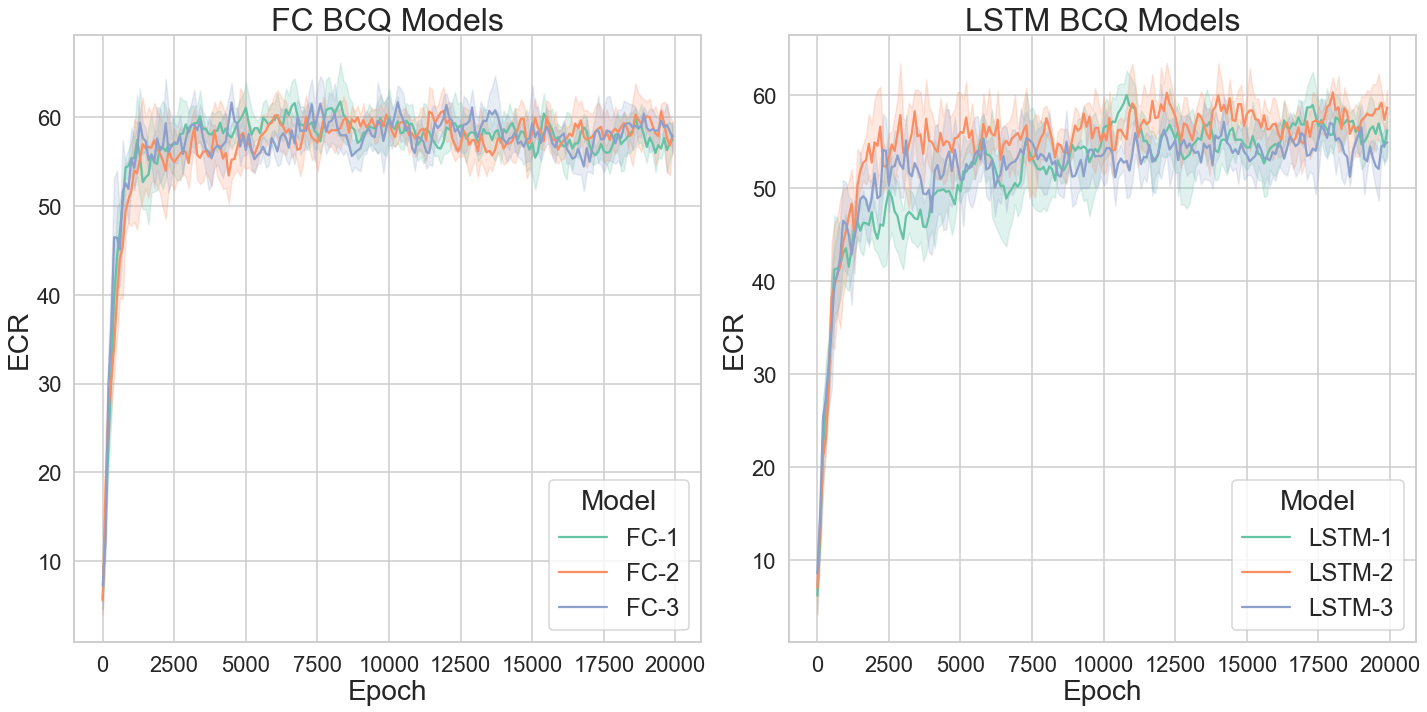

In [2]:
f1 = 32
f2 = 28
f3 = 24
f4 = 22

col='ECR'
fig, ax = plt.subplots(1,2, figsize=(20,10))

d = df.loc[df['Agent'].isin(['LSTM-1', 'LSTM-2', 'LSTM-3'])]
g1 = sns.lineplot(data=d, x='Epoch', y=col, hue='Agent', palette='Set2', ax=ax[1])
ax[1].set_xlabel('Epoch', fontsize=f2)
ax[1].set_ylabel('ECR', fontsize=f2)
ax[1].legend(title='Model', loc='lower right', fontsize=f3, title_fontsize=f2)
ax[1].tick_params(axis='both', labelsize=f4)
ax[1].set_title("LSTM BCQ Models", fontsize=f1)

d = df.loc[df['Agent'].isin(['FC-1', 'FC-2', 'FC-3'])]
g2 = sns.lineplot(data=d, x='Epoch', y=col, hue='Agent', palette='Set2', ax=ax[0])
ax[0].set_xlabel('Epoch', fontsize=f2)
ax[0].set_ylabel('ECR', fontsize=f2)
ax[0].legend(title='Model', loc='lower right', fontsize=f3, title_fontsize=f2)
ax[0].tick_params(axis='both', labelsize=f4)
ax[0].set_title("FC BCQ Models", fontsize=f1)
# fig.suptitle('Comparing Agents For Historical Context', fontsize=32)
fig.tight_layout()
plt.savefig('../temp/comparing_historical_context.png', dpi=350)
plt.show()

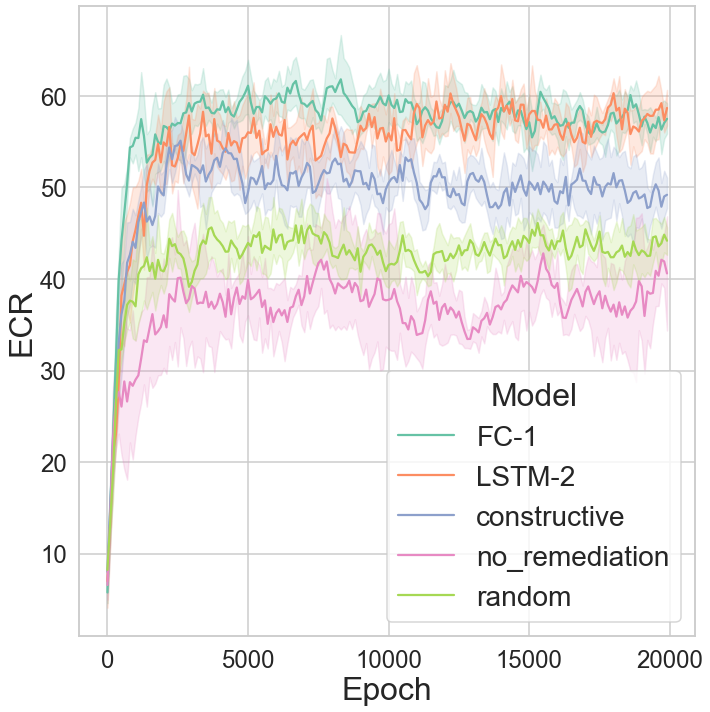

In [3]:
f1 = 32
f2 = 28
f3 = 24
col='ECR'
fig, ax = plt.subplots(1,1, figsize=(10,10))

d = df.loc[df['Agent'].isin(['FC-1', 'LSTM-2', 'constructive', 'no_remediation', 'random'])]
g1 = sns.lineplot(data=d, x='Epoch', y=col, hue='Agent', palette='Set2', ax=ax)

ax.set_xlabel("Epoch", fontsize=f1)
ax.set_ylabel("ECR", fontsize=f1)
ax.legend(title='Model', loc='lower right', fontsize=f2, title_fontsize=f1)
ax.tick_params(axis='both', labelsize=f3)
# fig.suptitle('Comparing Agents With ICAP Baselines', fontsize=24)
fig.tight_layout()
plt.savefig('../temp/comparing_adaptive_learning.png', dpi=800)
plt.show()


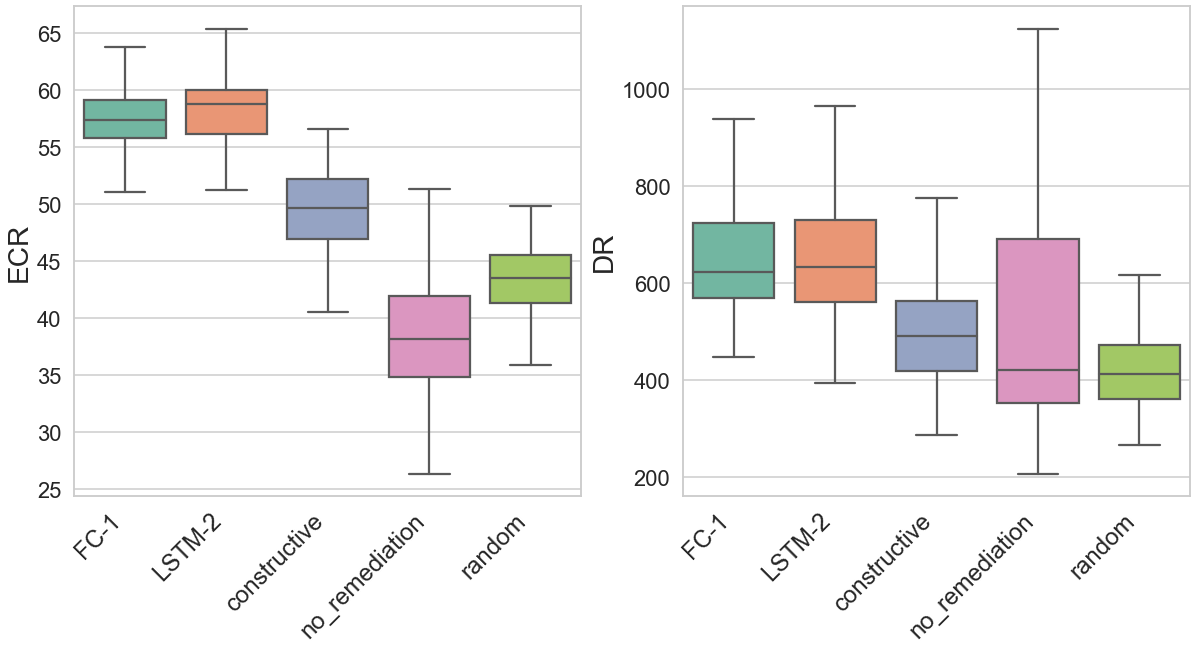

In [32]:
f1 = 32
f2 = 28
f3 = 24
f4 = 22

fig, (ax, ax2) = plt.subplots(1,2, figsize=(20,10))

d = df.loc[df['Agent'].isin(['FC-1', 'LSTM-2', 'constructive', 'no_remediation', 'random'])]
d = d.loc[d['Epoch']>=18000]

g3 = sns.boxplot(data=d, x='Agent', y="ECR", palette='Set2', ax=ax, showfliers=False)
ax.set_xlabel("", fontsize=f2)
ax.set_ylabel("ECR", fontsize=f2)
ax.tick_params(axis='x', labelsize=f3)
ax.tick_params(axis='y', labelsize=f4)

g4 = sns.boxplot(data=d, x='Agent', y="DR", palette='Set2', ax=ax2, showfliers=False)
ax2.set_xlabel("", fontsize=f2)
ax2.set_ylabel("DR", fontsize=f2)
ax2.tick_params(axis='x', labelsize=f3)
ax2.tick_params(axis='y', labelsize=f4)
fig.autofmt_xdate(rotation=45)
# fig.suptitle("Distribution Of Performance", fontsize=32)

fig.savefig('../temp/other_metrices.png', dpi=800)

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

m_comp = pairwise_tukeyhsd(endog=d['DR'], groups=d['Agent'], alpha=0.05)
print(m_comp)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------
          FC-1         LSTM-2   24.3036 0.8596  -44.9307   93.5379  False
          FC-1   constructive -142.7934  0.001 -212.0277  -73.5592   True
          FC-1 no_remediation  -126.019  0.001  -199.453  -52.5849   True
          FC-1         random -217.1798  0.001  -286.414 -147.9455   True
        LSTM-2   constructive -167.0971  0.001 -236.3313  -97.8628   True
        LSTM-2 no_remediation -150.3226  0.001 -223.7566  -76.8885   True
        LSTM-2         random -241.4834  0.001 -310.7176 -172.2491   True
  constructive no_remediation   16.7745    0.9  -56.6596   90.2085  False
  constructive         random  -74.3863 0.0281 -143.6206    -5.152   True
no_remediation         random  -91.1608 0.0065 -164.5948  -17.7267   True
--------------------------------------

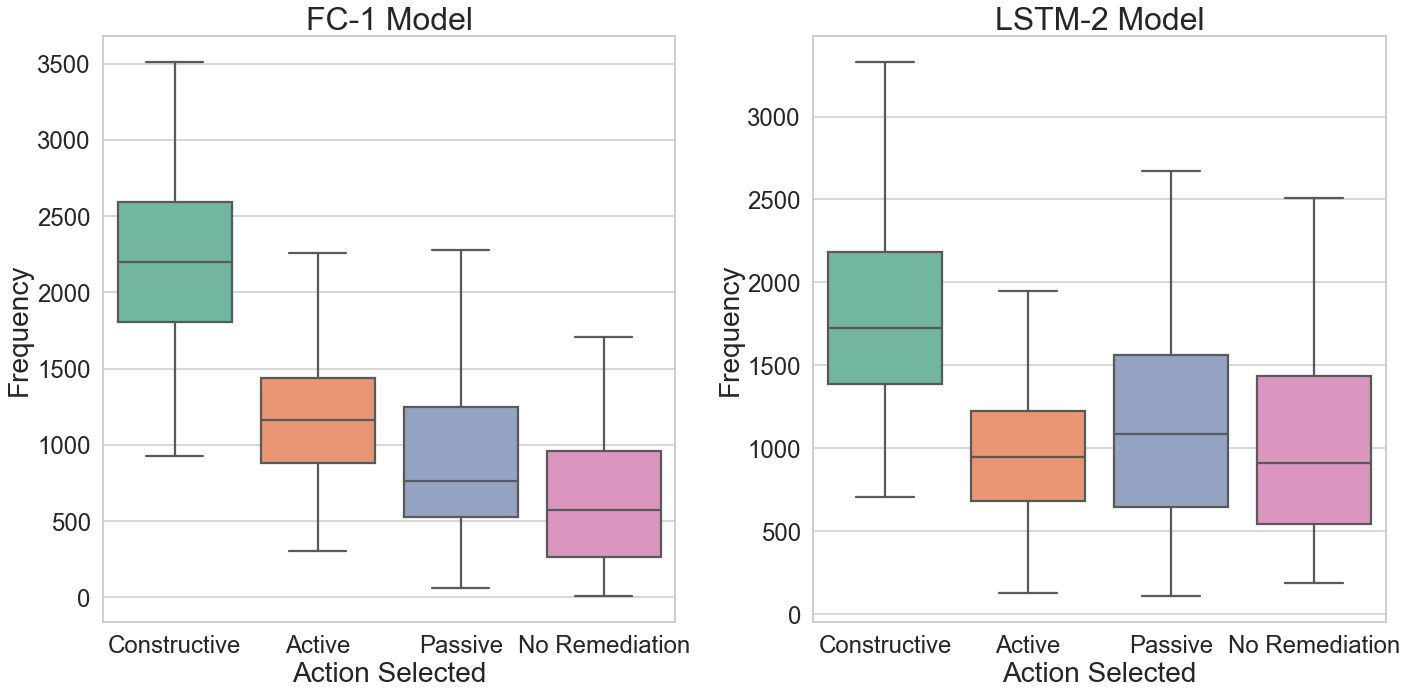

In [33]:
f1 = 32
f2 = 28
f3 = 24
f4 = 22

fig, axes = plt.subplots(1,2, figsize=(20,10))

fc1_act = pd.DataFrame(columns=['Action', 'Count'])

d = df_act.loc[df_act['Agent'].isin(['FC-1'])]
d = d.loc[d['Epoch']>=18000]
temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['Constructive']
temp['Action'] = 'Constructive'
fc1_act = pd.concat([fc1_act, temp], axis=0, ignore_index=True)

temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['Active']
temp['Action'] = 'Active'
fc1_act = pd.concat([fc1_act, temp], axis=0, ignore_index=True)

temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['Passive']
temp['Action'] = 'Passive'
fc1_act = pd.concat([fc1_act, temp], axis=0, ignore_index=True)

temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['No Remediation']
temp['Action'] = 'No Remediation'
fc1_act = pd.concat([fc1_act, temp], axis=0, ignore_index=True)

g1 = sns.boxplot(data=fc1_act, x='Action', y="Count", palette='Set2', ax=axes[0], showfliers=False)
axes[0].set_ylabel("Frequency", fontsize=f2)
axes[0].set_xlabel("Action Selected", fontsize=f2)
axes[0].set_title("FC-1 Model", fontsize=f1)
axes[0].tick_params(axis='both', labelsize=f3)


lstm2_act = pd.DataFrame(columns=['Action', 'Count'])

d = df_act.loc[df_act['Agent'].isin(['LSTM-2'])]
d = d.loc[d['Epoch']>=18000]
temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['Constructive']
temp['Action'] = 'Constructive'
lstm2_act = pd.concat([lstm2_act, temp], axis=0, ignore_index=True)

temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['Active']
temp['Action'] = 'Active'
lstm2_act = pd.concat([lstm2_act, temp], axis=0, ignore_index=True)

temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['Passive']
temp['Action'] = 'Passive'
lstm2_act = pd.concat([lstm2_act, temp], axis=0, ignore_index=True)

temp = pd.DataFrame(columns=['Action', 'Count'])
temp['Count'] = d['No Remediation']
temp['Action'] = 'No Remediation'
lstm2_act = pd.concat([lstm2_act, temp], axis=0, ignore_index=True)

g2 = sns.boxplot(data=lstm2_act, x='Action', y="Count", palette='Set2', ax=axes[1], showfliers=False)
axes[1].set_ylabel("Frequency", fontsize=f2)
axes[1].set_xlabel("Action Selected", fontsize=f2)
axes[1].set_title("LSTM-2 Model", fontsize=f1)
axes[1].tick_params(axis='both', labelsize=f3)
# fig.suptitle("Distribution Of Actions", fontsize=32)
plt.tight_layout()
plt.savefig('../temp/comparing_remediations.png', dpi=350)
plt.show()

In [38]:
fc1_act.groupby(['Action']).describe()

Count                                                        \
                count     mean         std    min      25%     50%      75%   
Action                                                                        
Active          100.0  1182.74  449.563641  306.0   882.50  1166.5  1436.25   
Constructive    100.0  2195.15  572.595109  928.0  1807.75  2197.0  2590.50   
No Remediation  100.0   658.57  444.400680   12.0   266.75   571.5   957.75   
Passive         100.0   961.54  674.087073   60.0   527.50   766.0  1246.25   

                        
                   max  
Action                  
Active          2471.0  
Constructive    3509.0  
No Remediation  1706.0  
Passive         2875.0

In [39]:
lstm2_act.groupby(['Action']).describe()

Count                                                        \
                count     mean         std    min      25%     50%      75%   
Action                                                                        
Active          100.0  1040.96  554.737683  127.0   683.00   947.5  1224.75   
Constructive    100.0  1812.84  586.931960  708.0  1389.75  1726.0  2180.50   
No Remediation  100.0  1003.42  565.608748  186.0   540.00   911.0  1435.75   
Passive         100.0  1140.78  618.128433  111.0   644.75  1085.5  1565.00   

                        
                   max  
Action                  
Active          2910.0  
Constructive    3327.0  
No Remediation  2509.0  
Passive         2671.0

In [7]:
m_comp = pairwise_tukeyhsd(endog=fc1_act['Count'], groups=fc1_act['Action'], alpha=0.05)
print(m_comp)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1         group2     meandiff p-adj    lower      upper    reject
--------------------------------------------------------------------------
        Active   Constructive  1012.41  0.001   814.0769  1210.7431   True
        Active No Remediation  -524.17  0.001  -722.5031  -325.8369   True
        Active        Passive   -221.2 0.0219  -419.5331   -22.8669   True
  Constructive No Remediation -1536.58  0.001 -1734.9131 -1338.2469   True
  Constructive        Passive -1233.61  0.001 -1431.9431 -1035.2769   True
No Remediation        Passive   302.97  0.001   104.6369   501.3031   True
--------------------------------------------------------------------------
